# Analytical response for HCP and VCP coil

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
import time


In [2]:
#%%

# Function Z = ZHCPFHT(rd, zsrc, zrec, eta, mur, dd, gz, ss , J0, gk):

    # This script computes the Horizontal Co-Planar loop response with the 
    # loops in air over a horizontally layered conductive medium as a function
    # of frequency, distance between the loops is fixed.
    # Fourier_bessel transform is done with so-called Fast Hankel Transform
    # filter table

def ZHCPFHT(rd, zsrc, zrec, eta, mur, dd, gz, ss , J0, gk):
    
    hp = zrec + zsrc
    nl = len(eta) - 1
    
    # start building reflection response
    
    glr = 0
    gam1 = np.sqrt(gk**2 + ss * eta[nl] * 4e-7 * np.pi * mur[nl])
    
    for il in range(nl-1, -1, -1):
        gam2 = gam1.copy()
        gam1 = np.sqrt(gk**2 + ss * eta[il] * 4e-7 * np.pi * mur[il])
        
        lr = (gam1 * mur[il +1] - gam2 * mur[il]) / (gam1 * mur[il+1] + gam2 * mur[il]) 
        
        #glr -> reflection coefficient per layer
        glr = (lr + glr * np.exp(-2 * gam2 * dd[il+1])) / (1 + lr * glr * np.exp(-2 * gam2 * dd[il+1]))
        
    Z = np.dot(J0, (glr * np.exp(-gam1 * hp) * gk**2 / gam1) / (4 * np.pi * gz * rd**2))
    
    return Z

In [3]:
#%%

# Function Z= ZHCPFHTI(rd, hm, hp, eta, dd, gz, J0, gk):

# This script computes the Horizontal Co-Planar loop response with the 
# loops in air over a horizontally layered conductive medium as a function
# of frequency, distance between the loops is fixed.
# Fourier-Bessel transform is done with so-called Fast Hankel Transform
# filter table

def ZHCPFHTI(rd, hm, hp, eta, dd, gz, J0, gk):
    
    # wavenumber and homogeneous space response (Green's function)
    
    gam1 = np.sqrt(gz * eta[0])
    Rm = np.sqrt(rd**2 + hm**2)
    Gm = np.exp(-gam1 * Rm) / (4 * np.pi * Rm)
    dz2m = (3 * (hm / Rm) **2 - 1) * (1 / Rm**2 - gam1 / Rm) + (hm/Rm)**2 * gam1**2
    Gd = (-eta[1] + dz2m / gz) * Gm
    
    # Layered medium response
    
    gam1 = np.sqrt(gk**2 + gz * eta[0])
    gam2 = np.sqrt(gk**2 + gz * eta[1])
    gam3 = np.sqrt(gk**2 + gz * eta[2])
    gam4 = np.sqrt(gk**2 + gz * eta[3])
    
    lr0 = (gam1 - gam2) / (gam1 + gam2)
    lr1 = (gam2 - gam3) / (gam2 + gam3)
    lr2 = (gam3 - gam4) / (gam3 + gam4)
    
    glr = (lr0 + lr1 * np.exp(-2 * gam2 * dd[1]) 
           + lr2 * np. exp( -2 * (gam2 * dd[1] + gam3 * dd[2]))
           + lr0 * lr1 * lr2 * np.exp(-2 * gam3 * dd[2])) / (1 + lr0 * lr1 * np.exp(-2 * gam2 * dd[1]) 
           + lr0 * lr2 * np.exp(-2 * (gam2 * dd[1] + gam3 * dd[2])) + lr1 * lr2 * np.exp(-2 * gam3 * dd[2]))
                                                              
    # when there are more than three reflectors, use lines below and coment out lines 80-92
    
#    nl = len(eta) -1
#    # start building reflection response
#    glr = 0
#    gam1 = np.sqrt(gk**2 + (rd * eta[nl] * 4e-7 * np.pi))
    
#    for il in range(nl, -1, -1):
#        gam2 = gam1.copy()
#        gam1 = np.sqrt(gk**2 + (rd * eta[il] * 4e-7 * np.pi))    
#        lr = (gam1 -gam2) / (gam1 + gam2)
#        glr = (lr + glr * np.exp(-2 * gam2 * dd[il+1])) / (1 + lr * glr * np.exp(-2 * gam2 * dd[il+1]))
            
    Z = np.dot(J0, (glr * np.exp(-gam1 * hp) * gk**2 / gam1)) / (4 * np.pi * gz * rd**2 * Gd)
    return Z
    
#%%


In [4]:
# Function Z=ZVCPFHT(rd,zsrc,zrec,eta,dd,gz,ss,J1,gk)

# This script computes the Horizontal Co-Planar loop response with the 
# loops in air over a horizontally layered conductive medium as a function
# of frequency, distance between the loops is fixed.
# Fouier_bessel transform is done with so-called Fast Hankel Transform
# filter table

def ZVCPFHT(rd, zsrc, zrec, eta, dd, gz, ss, J1, gk):
    
    hp = zrec + zsrc
    nl = len(eta) - 1
    
    # start building reflection response
    glr = 0
    gam1 = np.sqrt(gk**2 + ss * eta[nl] * 4e-7 * np.pi)
    
    for il in range(nl-1, -1, -1):
        gam2 = gam1
        gam1 = np.sqrt(gk**2 + ss * eta[il] * 4e-7 * np.pi)
        lr = (gam1 - gam2) / (gam1 + gam2)
        glr = (lr + glr * np.exp(-2 * gam2 * dd[il + 1])) / (1 + lr * glr * np.exp(-2 * gam2 * dd[il+1]))
    
    Z = np.dot(J1, (glr * np.exp(-gam1 * hp)) / (4 * np.pi * gz * rd**3))
    
    return Z

In [5]:
#%%

# LINcorrHV

# This script computes the Horizontal and Vertical Co-Planar loop responses 
# with the loops in air over a horizontally layered conductive medium as a 
# function of frequency, distance between the loops is fixed.
# Fourier_bessel transform is done with so-called Fast Hankel Transform
# filter table
 
# frequency of operation in Hz

freq = 9000
s = 2j * np.pi * freq

# magnetic permeability of free space

mu = 4e-7 * np.pi
gz = s * mu
nsgm = 46
ZHCP = np.zeros((3, nsgm), dtype = complex)
ZVCP = ZHCP.copy()


In [6]:
# conductivity in S/m

sgm = np.logspace(-4, -1, nsgm)[np.newaxis]
offset = np.array([2, 4, 8])[np.newaxis]

# At zero height
grgr = (1 + 1j) * offset.T @ np.sqrt(4e-7 * np.pi**2 * freq * sgm)
# HCP loops exact secondary half space response for loops on surface
Zhcpa = 2 * (9 - (9 + 9 * grgr + 4* grgr**2 + grgr**3) * np.exp(-grgr)) / (grgr**2) - 1
# VCP loops exact secondary half space response for loops on surface
Zvcpa = 2 * (grgr**2 -3 + (3 * (1 + grgr) + grgr**2) * np.exp(-grgr)) / grgr**2 - 1


In [7]:

# numerical modelling for source and receiver loops elevated above ground

zsrc = 5e-2
zrec = 5e-2
hm = abs(zrec - zsrc)
dd = np.array([0, 1e9])

# Horizontal coplanar loops
# Wavenumber and homogeneous space response (Green's function)

gam1 = np.sqrt(gz * 1e-10)
Rm = np.sqrt(offset**2 + hm**2)[0]
Gm = np.round(np.exp(-gam1 * Rm),5) / (4 * np.pi * gz * Rm)
Gdh = ((3 * (hm / Rm)**2 -1) * (1 / Rm**2 + gam1/Rm) + ((hm/Rm)**2 -1) * gam1**2) * Gm
Gdv = -(1/Rm**2 + gam1 / Rm + gam1**2) * Gm


In [8]:
# Load filter table for J0 * kappa and J1 * kappa kernels

kk201Hankel = np.loadtxt('kk201Hankel.txt', dtype='float')


J0 = (kk201Hankel[:,1] * kk201Hankel[:,0])[np.newaxis]
J1 = (kk201Hankel[:,2] * kk201Hankel[:,0])[np.newaxis]
gk = np.dot(kk201Hankel[:,0][np.newaxis].T, 1/offset)
mur = np.array([1,1,1,1])

for isgm in range(0, nsgm):
    eta = np.array([1e-10, sgm[0,isgm]])
    ZHCP[:, isgm] = ZHCPFHT(offset, zsrc, zrec, eta, mur, dd, gz, s, J0, gk) / Gdh
    ZVCP[:, isgm] = ZVCPFHT(offset, zsrc, zrec, eta, dd, gz, s, J1, gk) / Gdv
    
# now compute apparent conductivity as if low induction number is valid

sapph1 = np.imag(ZHCP) / (2e-7 * freq * np.pi**2 * np.matlib.repmat(offset.T, 1, nsgm)**2)
sappv1 = np.imag(ZVCP) / (2e-7 * freq * np.pi**2 * np.matlib.repmat(offset.T, 1, nsgm)**2)

# compute correction factor

corrfach1 = np.matlib.repmat(sgm[0], 3, 1) / sapph1
corrfacv1 = np.matlib.repmat(sgm[0], 3, 1) / sappv1 

Text(0.5, 1.0, "['VCP modeled after CMD tool at ', '0.05', 'm elevation']")

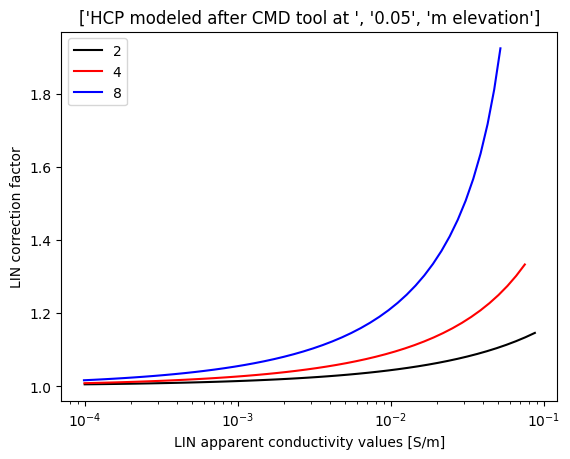

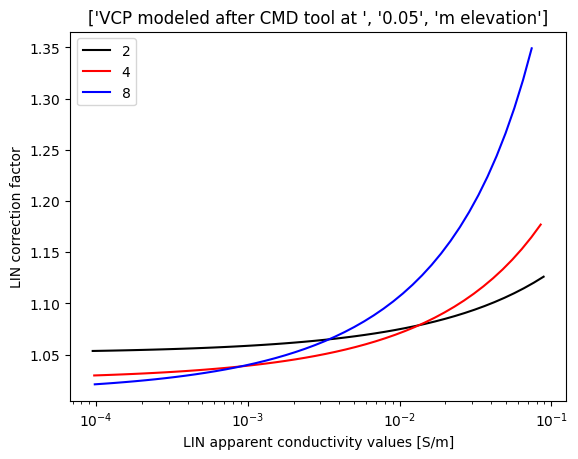

In [9]:
#%%

plt.figure()
plt.semilogx(sapph1[0,:], corrfach1[0,:], 'k', label = str(offset[0,0]))
plt.semilogx(sapph1[1,:], corrfach1[1,:], 'r', label = str(offset[0,1]))
plt.semilogx(sapph1[2,:], corrfach1[2,:], 'b', label = str(offset[0,2]))
plt.xlabel('LIN apparent conductivity values [S/m]')
plt.ylabel('LIN correction factor')
plt.legend()
plt.title(['HCP modeled after CMD tool at ', str(zsrc), 'm elevation'])

plt.figure()
plt.semilogx(sappv1[0,:], corrfacv1[0,:], 'k', label = str(offset[0,0]))
plt.semilogx(sappv1[1,:], corrfacv1[1,:], 'r', label = str(offset[0,1]))
plt.semilogx(sappv1[2,:], corrfacv1[2,:], 'b', label = str(offset[0,2]))
plt.xlabel('LIN apparent conductivity values [S/m]')
plt.ylabel('LIN correction factor')
plt.legend()
plt.title(['VCP modeled after CMD tool at ', str(zsrc), 'm elevation'])

In [10]:
#%%

# now with loops on the ground and I assume they are in a case wich puts them
# effectively 1 cm above ground

zsrc = 0
zrec = 0

# compute whole space response

hm = np.abs(zrec - zsrc)
Rm = np.sqrt(offset**2 + hm**2)[0]
Gm = np.exp(-gam1 * Rm) / (4 * np.pi * gz * Rm)
Gdh = ((3 * (hm / Rm)**2 -1) * (1 / Rm**2 + gam1/Rm) + ((hm/Rm)**2 -1) * gam1**2) * Gm
Gdv = -(1/Rm**2 + gam1 / Rm + gam1**2) * Gm
mur = np.array([1, 1])

# compute mutual impedance ratio for HCP and VCP systems

for isgm in range(0, nsgm):
    eta = np.array([1e-10, sgm[0,isgm]])
    ZHCP[:, isgm] = ZHCPFHT(offset, zsrc, zrec, eta, mur, dd, gz, s, J0, gk) / Gdh
    ZVCP[:, isgm] = ZVCPFHT(offset, zsrc, zrec, eta, dd, gz, s, J1, gk) / Gdv


In [11]:
# now compute apparent conductivity as if low induction number is valid

sapph1 = np.imag(ZHCP) / (2e-7 * freq * np.pi**2 * np.matlib.repmat(offset.T, 1, nsgm) **2)
sappv1 = np.imag(ZVCP) / (2e-7 * freq * np.pi**2 * np.matlib.repmat(offset.T, 1, nsgm)**2)

# compute correction factor

corrfach1 = np.matlib.repmat(sgm[0], 3, 1) / sapph1
corrfacv1 = np.matlib.repmat(sgm[0], 3, 1) / sappv1 

Text(0.5, 1.0, "['VCP modeled after CMD tool at ', '0', 'm elevation']")

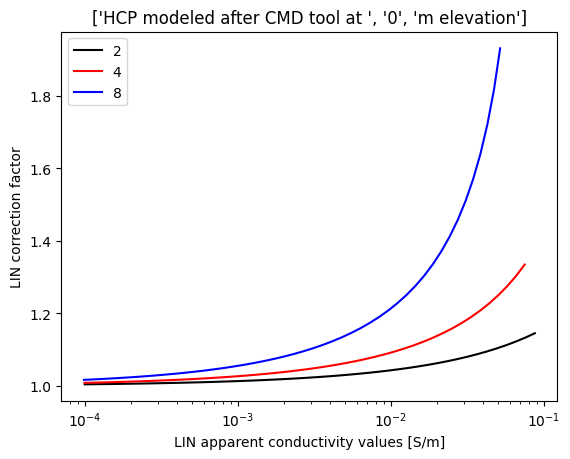

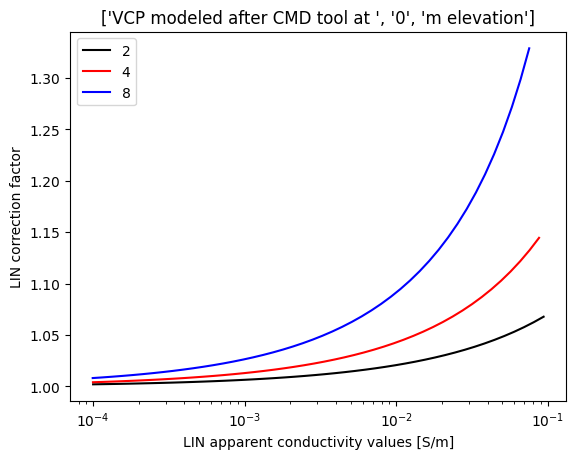

In [12]:
#%%

plt.figure()
plt.semilogx(sapph1[0,:], corrfach1[0,:], 'k', label = str(offset[0,0]))
plt.semilogx(sapph1[1,:], corrfach1[1,:], 'r', label = str(offset[0,1]))
plt.semilogx(sapph1[2,:], corrfach1[2,:], 'b', label = str(offset[0,2]))
plt.xlabel('LIN apparent conductivity values [S/m]')
plt.ylabel('LIN correction factor')
plt.legend()
plt.title(['HCP modeled after CMD tool at ', str(zsrc), 'm elevation'])

plt.figure()
plt.semilogx(sappv1[0,:], corrfacv1[0,:], 'k', label = str(offset[0,0]))
plt.semilogx(sappv1[1,:], corrfacv1[1,:], 'r', label = str(offset[0,1]))
plt.semilogx(sappv1[2,:], corrfacv1[2,:], 'b', label = str(offset[0,2]))
plt.xlabel('LIN apparent conductivity values [S/m]')
plt.ylabel('LIN correction factor')
plt.legend()
plt.title(['VCP modeled after CMD tool at ', str(zsrc), 'm elevation'])